In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [9]:
import pandas_datareader as pdr
key="21b493b1578f086094bef0ee349faa0ee2cf5615"

In [10]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [11]:
df.to_csv('AAPL.csv')

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-11 00:00:00+00:00,113.49,118.18,113.33,117.81,97082814,104.862588,109.196058,104.714751,108.854185,97082814,0.0,1.0
1,AAPL,2015-08-12 00:00:00+00:00,115.24,115.42,109.63,112.53,101685610,106.479554,106.645871,101.296022,103.975566,101685610,0.0,1.0
2,AAPL,2015-08-13 00:00:00+00:00,115.15,116.40,114.54,116.04,48535789,106.396396,107.551372,105.832768,107.218739,48535789,0.0,1.0
3,AAPL,2015-08-14 00:00:00+00:00,115.96,116.31,114.01,114.32,42929516,107.144821,107.468214,105.343058,105.629492,42929516,0.0,1.0
4,AAPL,2015-08-17 00:00:00+00:00,117.16,117.65,115.50,116.04,40884745,108.253598,108.706348,106.719789,107.218739,40884745,0.0,1.0


In [15]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-08-03 00:00:00+00:00,435.75,446.5457,431.57,432.80,77037847,434.947532,445.723351,430.775230,432.002964,77037847,0.00,1.0
1254,AAPL,2020-08-04 00:00:00+00:00,438.66,443.1600,433.55,436.53,43198092,437.852173,442.343886,432.751583,435.726095,43198092,0.00,1.0
1255,AAPL,2020-08-05 00:00:00+00:00,440.25,441.5700,435.59,437.51,30497988,439.439245,440.756814,434.787826,436.704291,30497988,0.00,1.0
1256,AAPL,2020-08-06 00:00:00+00:00,455.61,457.6500,439.19,441.62,50607225,454.770958,456.807201,438.381197,440.806722,50607225,0.00,1.0
1257,AAPL,2020-08-07 00:00:00+00:00,444.45,454.7000,441.17,452.82,49511403,444.450000,454.700000,441.170000,452.820000,49511403,0.82,1.0


In [16]:
df1=df.reset_index()['close']

In [18]:
df1

0       113.49
1       115.24
2       115.15
3       115.96
4       117.16
         ...  
1253    435.75
1254    438.66
1255    440.25
1256    455.61
1257    444.45
Name: close, Length: 1258, dtype: float64

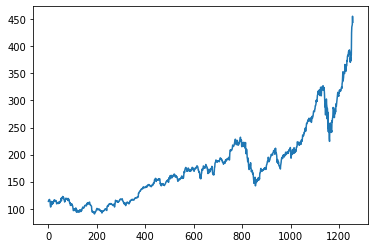

In [19]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
## LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.06337778]
 [0.06816875]
 [0.06792236]
 ...
 [0.95794891]
 [1.        ]
 [0.96944726]]


In [54]:
## Splitting data into train and test
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df):]

In [55]:
training_size,test_size

(880, 378)

In [56]:
train_data

array([[0.06337778],
       [0.06816875],
       [0.06792236],
       [0.0701399 ],
       [0.07342514],
       [0.07161825],
       [0.06753908],
       [0.06107811],
       [0.04221535],
       [0.03498782],
       [0.03668519],
       [0.05297451],
       [0.06181729],
       [0.06283024],
       [0.06137925],
       [0.04758124],
       [0.06022942],
       [0.05483615],
       [0.05182468],
       [0.06014729],
       [0.05423385],
       [0.06085909],
       [0.06534892],
       [0.06836039],
       [0.07101596],
       [0.07137186],
       [0.06455499],
       [0.06326827],
       [0.06808662],
       [0.06313138],
       [0.06565007],
       [0.0675117 ],
       [0.06671777],
       [0.06050319],
       [0.05124976],
       [0.05368631],
       [0.05267336],
       [0.05486353],
       [0.05595861],
       [0.05740959],
       [0.05595861],
       [0.05245435],
       [0.05962713],
       [0.05820352],
       [0.05872368],
       [0.05439812],
       [0.05891532],
       [0.056

In [57]:
import numpy
## convert an array of value in datset matrix
def create_dataset(dataset,time_step=1):
        dataX,datay=[],[]
        for i in range(len(dataset)-time_step-1):
                a=dataset[i:(i+time_step),0]
                dataX.append(a)
                datay.append(dataset[i+time_step,0])
        return numpy.array(dataX),numpy.array(datay)


In [58]:
## reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [59]:
print(X_test.shape), print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [60]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 3s 230ms/step - loss: 0.0088 - val_loss: 0.0518
Epoch 2/100
13/13 [==============================] - 2s 171ms/step - loss: 0.0016 - val_loss: 0.0118
Epoch 3/100
13/13 [==============================] - 2s 168ms/step - loss: 6.8214e-04 - val_loss: 0.0032
Epoch 4/100
13/13 [==============================] - 2s 174ms/step - loss: 4.3899e-04 - val_loss: 0.0045
Epoch 5/100
13/13 [==============================] - 2s 172ms/step - loss: 4.2885e-04 - val_loss: 0.0045
Epoch 6/100
13/13 [==============================] - 2s 171ms/step - loss: 4.1467e-04 - val_loss: 0.0043
Epoch 7/100
13/13 [==============================] - 2s 171ms/step - loss: 3.9517e-04 - val_loss: 0.0047
Epoch 8/100
13/13 [==============================] - 2s 175ms/step - loss: 3.7921e-04 - val_loss: 0.0045
Epoch 9/100
13/13 [==============================] - 2s 174ms/step - loss: 3.8656e-04 - val_loss: 0.0063
Epoch 10/100
13/13 [==============================] - 2s 171ms/

In [66]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [67]:
## Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict) 

In [68]:
## Calculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.01050145693319024

In [69]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.0397157853539505

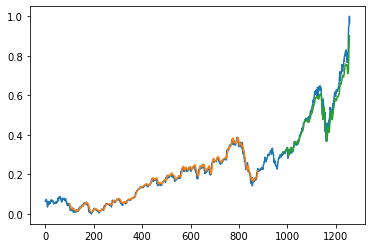

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [71]:
len(test_data)

378

In [72]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.4279847783831139,
 0.4228105237221782,
 0.3802666520655954,
 0.3669340487858297,
 0.42855969556766227,
 0.42483642237249164,
 0.46020751772661317,
 0.43091411832343207,
 0.45026966353656206,
 0.44884605907958497,
 0.4122156213212145,
 0.42322117885399846,
 0.4135844717606154,
 0.47124045226818534,
 0.4629178415966272,
 0.48109617543187233,
 0.48635256111917213,
 0.5007528677416706,
 0.538533139869138,
 0.5313603635666767,
 0.5375475675527692,
 0.5268979111342296,
 0.5108276069756619,
 0.48739288745311693,
 0.5085553152462563,
 0.505625975305938,
 0.5273633202836259,
 0.5279108604593863,
 0.515344813425685,
 0.5403947764667233,
 0.5570126208010513,
 0.5440632956443179,
 0.5552604922386181,
 0.5673063761053467,
 0.5757111178032689,
 0.584225367536343,
 0.6017192761518877,
 0.6150792564404414,
 0.6052235332767543,
 0.5949297779724587,
 0.6001040326333946,
 0.5950940400251868,
 0.6149423713965012,
 0.6099597557970816,
 0.6266323541489858,
 0.6201166260574371,
 0.6257015358501931,
 0.619

In [74]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9205192]
101
1 day input [0.42281052 0.38026665 0.36693405 0.4285597  0.42483642 0.46020752
 0.43091412 0.45026966 0.44884606 0.41221562 0.42322118 0.41358447
 0.47124045 0.46291784 0.48109618 0.48635256 0.50075287 0.53853314
 0.53136036 0.53754757 0.52689791 0.51082761 0.48739289 0.50855532
 0.50562598 0.52736332 0.52791086 0.51534481 0.54039478 0.55701262
 0.5440633  0.55526049 0.56730638 0.57571112 0.58422537 0.60171928
 0.61507926 0.60522353 0.59492978 0.60010403 0.59509404 0.61494237
 0.60995976 0.62663235 0.62011663 0.62570154 0.6197881  0.62356613
 0.62394941 0.62310072 0.63380513 0.6378843  0.64275741 0.63509185
 0.66022394 0.66558984 0.69441783 0.71864648 0.67226983 0.68020916
 0.69168013 0.71656583 0.71522435 0.71560763 0.71010485 0.73515482
 0.75612561 0.73841268 0.75149889 0.72080926 0.74312153 0.75138938
 0.74950037 0.74950037 0.77616558 0.77298984 0.79675309 0.80124292
 0.80307718 0.79823145 0.81553371 0.82284338 0.80967503 0.80753963
 0.82976976 0.81490404 0.81788814 

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [76]:
import matplotlib.pyplot as plt
len(df1)

1258

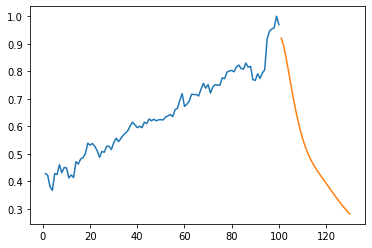

In [77]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

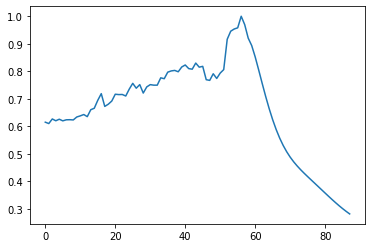

In [78]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

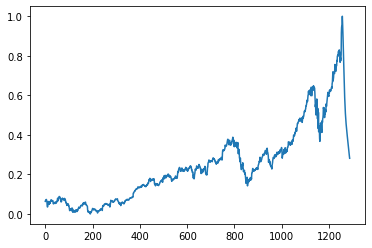

In [79]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)